In [ ]:
!git clone https://github.com/bearpelican/musicautobot.git

Cloning into 'musicautobot'...
remote: Enumerating objects: 4131, done.
remote: Total 4131 (delta 0), reused 0 (delta 0), pack-reused 4131
Receiving objects: 100% (4131/4131), 83.43 MiB | 24.59 MiB/s, done.
Resolving deltas: 100% (2992/2992), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('musicautobot')

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!apt install musescore fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!pip install torch fastai music21 pebble fluidsynth midi2audio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  avahi-daemon bind9-host desktop-file-utils fluid-soundfont-gm
  fluidr3mono-gm-soundfont geoclue-2.0 geoip-database
  gstreamer1.0-plugins-base iio-sensor-proxy libavahi-core7 libavahi-glib1
  libbind9-160 libbrotli1 libcap2-bin libcdparanoia0 libdaemon0 libdns1100
  libfluidsynth1 libgeoclue-2-0 libgeoip1 libgl1-mesa-glx
  libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libhyphen0 libisc169
  libisccc160 libisccfg160 liblwres160 libmbim-glib4 libmbim-proxy libmm-glib0
  libnl-genl-3-200 libnss-mdns liborc-0.4-0 libpam-cap libportaudio2
  libpulsedsp libqmi-glib5 libqmi-proxy libqt5help5 libqt5positioning5
  libqt5qml5 libqt5quick5 libqt5sensors5 libqt5sql5-sqlite libqt5svg5


In [ ]:
!pip install musicautobot

In [ ]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *
from musicautobot.multitask_transformer import *
from musicautobot.numpy_encode import stream2npenc_parts
from musicautobot.utils.setup_musescore import setup_musescore
setup_musescore()

In [ ]:
from midi2audio import FluidSynth
from IPython.display import Audio

In [ ]:
def play_wav(stream):
    out_midi = stream.write('midi')
    out_wav = str(Path(out_midi).with_suffix('.wav'))
    FluidSynth("font.sf2").midi_to_audio(out_midi, out_wav)
    return Audio(out_wav)

In [ ]:

config = multitask_config();

midi_path =  Path('/content/drive/MyDrive/data/midi')

data_path = Path('/content/drive/MyDrive/data/numpy')
data_save_name = 'musicitem_data_save.pkl'

In [ ]:

data = MusicDataBunch.empty(data_path)
vocab = data.vocab

In [ ]:

pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmallKeyC.pth'
# pretrained_url = 'https://ashaw-midi-web-server.s3-us-west-2.amazonaws.com/pretrained/MultitaskSmall.pth'
pretrained_path = data_path/'pretrained'/Path(pretrained_url).name
pretrained_path.parent.mkdir(parents=True, exist_ok=True)
download_url(pretrained_url, dest=pretrained_path)

In [ ]:

learn = multitask_model_learner(data, pretrained_path=pretrained_path)


In [ ]:

example_dir = midi_path/'examples/Bach'
midi_files = get_files(example_dir, recurse=True, extensions='.midi'); midi_files[:26]

[PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/1080-c01.mid'),
 PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/1080-c02.mid'),
 PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/1080c02b.mid'),
 PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/1080-c12.mid'),
 PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/kunst_der_fuge_19_(c)simonetto.mid')]

In [ ]:
file = midi_files[1]; file

PosixPath('/content/drive/MyDrive/data/midi/examples/Bach/1080-c02.mid')

In [ ]:

item = MusicItem.from_file(file, data.vocab)

x = item.to_tensor()
x_pos = item.get_pos_tensor()

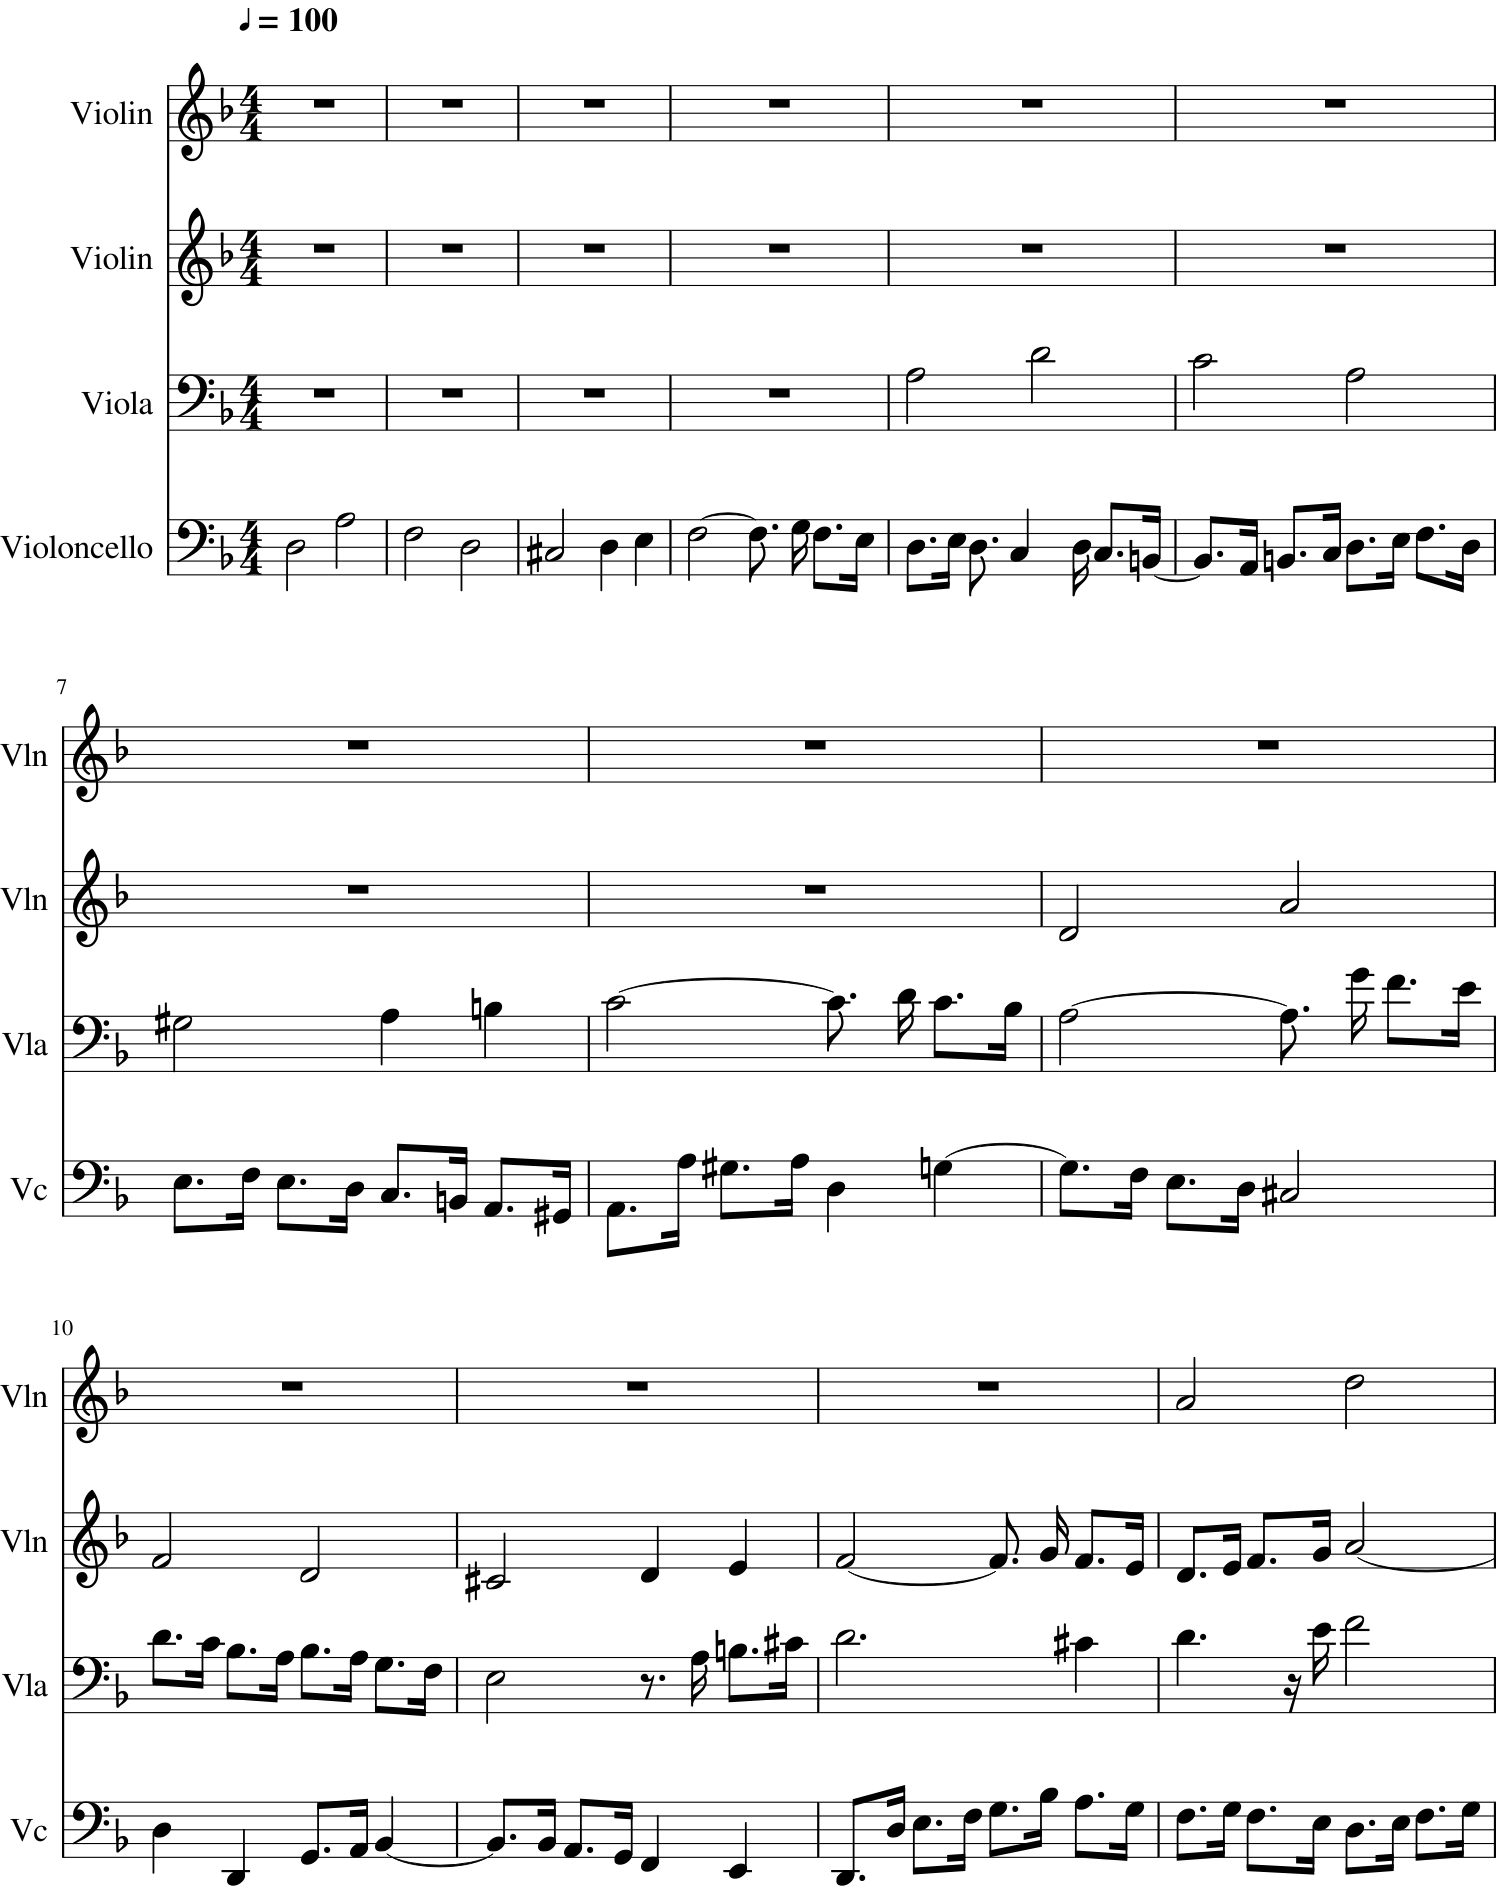

In [ ]:
item.show()

In [ ]:
# item.play()
#play_wav(item.stream)

1. NextWord/Autocomplete

In [ ]:
seed_len = 1000 
seed = item.trim_to_beat(seed_len)

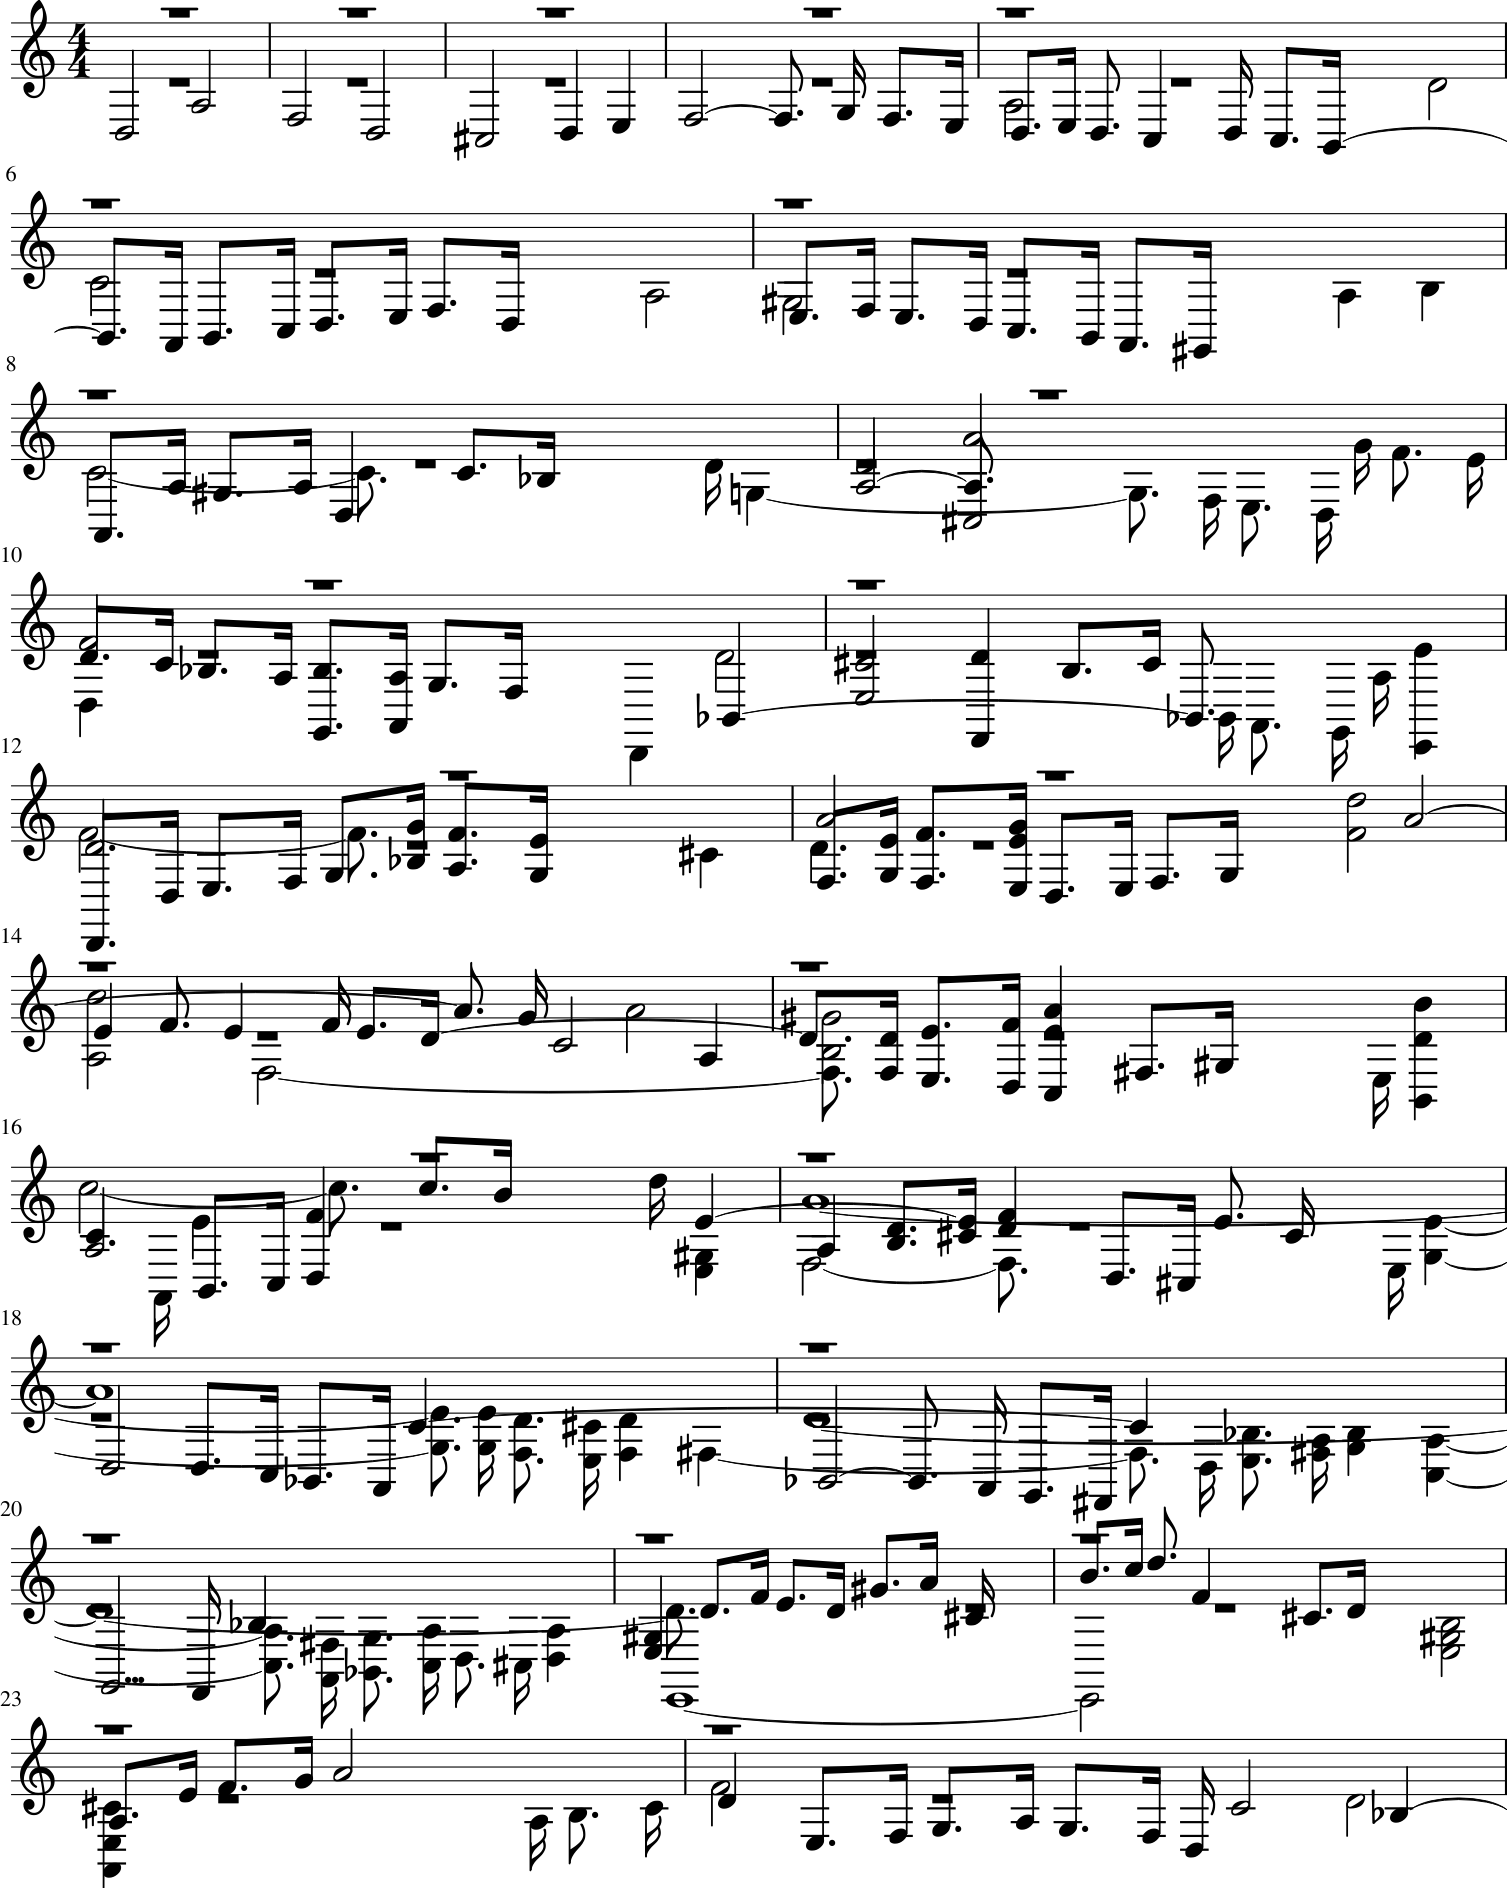

In [ ]:
seed.show()

In [ ]:
pred_nw, full = learn.predict_nw(seed, n_words=1000)

/content/musicautobot/musicautobot/multitask_transformer/model.py:82: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len
/content/musicautobot/musicautobot/multitask_transformer/learner.py:83: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  if ((last_pos - start_pos) // 16) <= min_bars: logit

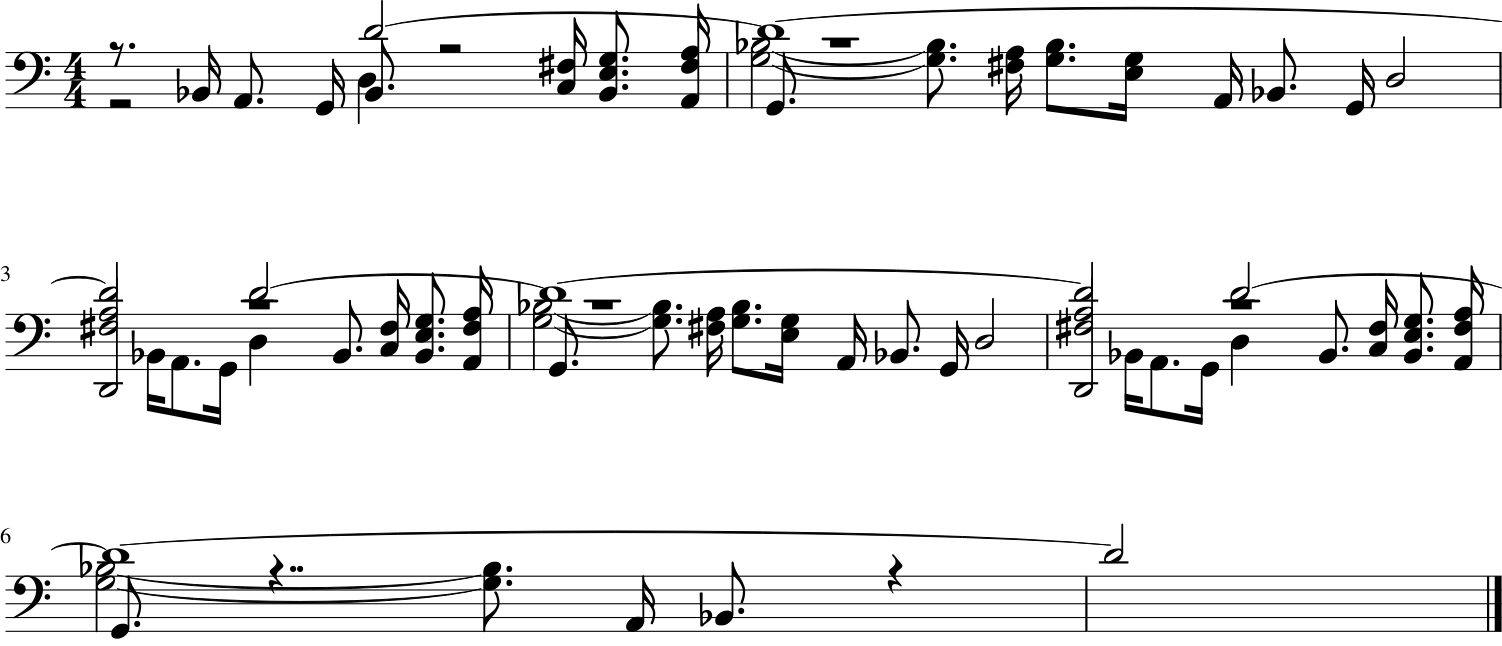

In [ ]:
pred_nw.show()

In [ ]:
play_wav(pred_nw.stream)

Output hidden; open in https://colab.research.google.com to view.

Add more randomness

/content/musicautobot/musicautobot/multitask_transformer/model.py:82: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len
/content/musicautobot/musicautobot/multitask_transformer/learner.py:83: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  if ((last_pos - start_pos) // 16) <= min_bars: logit

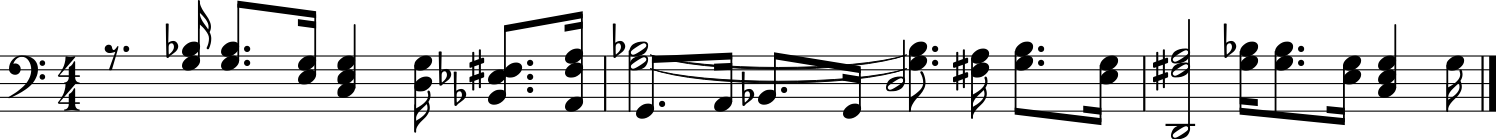

In [ ]:
pitch_temp = 1.4 # randomness of melody
tempo_temp = 1.0 # randomness or rhythm
top_k = 400
pred_nw_rand, full = learn.predict_nw(seed, temperatures=(pitch_temp, tempo_temp), top_k=top_k, top_p=0.5)
pred_nw_rand.show()

In [ ]:
play_wav(pred_nw_rand.stream)

Ignore the below